<h1> Adding the required imports </h1>

In [1]:
%%capture
!pip install networkx[default]
!pip install wikipedia
!pip3 install pickle5
!pip install dgl

In [2]:
%%capture
from bs4 import BeautifulSoup
import requests 
import re
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import wikipedia
import nltk
nltk.download("all")
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
import warnings

<h1>For extracting text and links</h1>

In [ ]:
pattern = re.compile(r"/wiki/([\w\d_]+)$")
page_pattern = re.compile(r"([\w\d\s])+")

In [ ]:
G = nx.DiGraph()

<h2>I have used TF.IDF to extract feature vector from the graph</h2>

In [ ]:
def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))

def page_content(name):
    # Specify the title of the Wikipedia page
    wiki = wikipedia.page(name)

    # Extract the plain text content of the page, excluding images, tables, and other data.
    text = wiki.content
    text = text.replace('==', '')
    text = text.replace('\n', '')[:-12]
    text_words = nltk.word_tokenize(text)
    stop_text = [word for word in text_words if word not in stop]

    valid_token = []
    for word in stop_text:
        if len(word)>2:                
            res = re.match(page_pattern,word)
            if res:
                valid_token.append(word)
    return listToString(valid_token)

In [ ]:
def feature_vector(name):
    vectorizer = TfidfVectorizer(max_features=50)
    X = vectorizer.fit_transform([page_content(name)])
    return X.toarray()

<h1>I have used these topics as that in the open list</h1>

In [ ]:
open_list = ["Algebra", "Derivative", "Integral"
    ,"Statistics", "Probability"]
closed_list = ["Main_Page"]

In [ ]:
l = len(open_list)
fv = feature_vector("Algebra")
G.add_node(open_list[0], weight=fv)
nodes = [open_list[0]]

while len(nodes) < 10000:

    ele = open_list.pop(0)
    closed_list.append(ele)

    r = requests.get(f"https://en.wikipedia.org/wiki/{ele}").text
    soup = BeautifulSoup(r, 'html.parser')
    all_anchor_tags = soup.find_all('a')
    links = [str(link.get("href")) for link in all_anchor_tags][:20]
    valid_links = []

    for link in links:
        result = pattern.search(link)
        if result and link not in closed_list:
            valid_links.append(result.group(1))

    # Popping out the first one and passing on to the next

    for all_links in valid_links:
        if all_links in nodes:
            G.add_edge(ele, all_links)
        else:
            nodes.append(all_links)
            try:
                fv = feature_vector(all_links)
            except:
                continue
            G.add_node(all_links, weight=fv)
            G.add_edge(ele, all_links)
    print(len(nodes), "nodes processed")
    open_list.extend(valid_links)

9 nodes processed
19 nodes processed


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Streaming output truncated to the last 5000 lines.
1183 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1190 nodes processed
1199 nodes processed
1210 nodes processed
1218 nodes processed
1218 nodes processed
1223 nodes processed
1225 nodes processed
1227 nodes processed
1237 nodes processed
1237 nodes processed
1237 nodes processed
1238 nodes processed
1238 nodes processed
1238 nodes processed
1247 nodes processed
1247 nodes processed
1247 nodes processed
1255 nodes processed
1258 nodes processed
1263 nodes processed
1269 nodes processed
1276 nodes processed
1277 nodes processed
1280 nodes processed
1280 nodes processed
1285 nodes processed
1294 nodes processed
1298 nodes processed
1306 nodes processed
1315 nodes processed
1315 nodes processed
1315

<h1> I have trained the graph and saved it into a pickle file the graph has >10000 nodes</h1>

In [ ]:
nx.write_gpickle(G, "test.gpickle")

<h1>These are some insights from the graph</h1>

<h4>This containes</h4>


1.   Nodes
2.   Edges
3.   Degree Centrality
4.   Betweenees Centrality
5.   Clustering Coefficient
6.   Number of triangle in the graph



In [4]:
G = nx.read_gpickle("test.gpickle")

In [5]:
print(G.edges)

[('Algebra', 'Algebra_over_a_field'), ('Algebra', 'Quadratic_formula'), ('Algebra', 'Arabic_language'), ('Algebra', 'Bonesetter'), ('Algebra', 'Areas_of_mathematics'), ('Algebra', 'Mathematics'), ('Algebra', 'Mathematical_symbol'), ('Algebra', 'Formula'), ('Algebra', 'Quadratic_function'), ('Algebra', 'Quadratic_equation'), ('Algebra', 'Elementary_algebra'), ('Algebra', 'Mathematical_analysis'), ('Algebra', 'Number_theory'), ('Algebra', 'Abstract_algebra'), ('Algebra', 'Division_ring'), ('Algebra', 'Quadratic_polynomial'), ('Algebra', 'Set_theory'), ('Algebra', 'Monic_polynomial'), ('Algebra', 'Finitely_generated_group'), ('Algebra', 'Algebraic_fraction'), ('Algebra', 'Polynomial_division'), ('Algebra', 'Recreational_mathematics'), ('Algebra_over_a_field', 'Algebraic_structure'), ('Algebra_over_a_field', 'Semigroup'), ('Algebra_over_a_field', 'Racks_and_quandles'), ('Algebra_over_a_field', 'Quasigroup'), ('Algebra_over_a_field', 'Abelian_group'), ('Algebra_over_a_field', 'Group_theory'

In [6]:
print(G.nodes)

['Algebra', 'Algebra_over_a_field', 'Quadratic_formula', 'Arabic_language', 'Bonesetter', 'Areas_of_mathematics', 'Mathematics', 'Mathematical_symbol', 'Formula', 'Differential_calculus', 'Derivative', 'Graph_of_a_function', 'Tangent_line', 'Slope', 'Calculus', 'Fundamental_theorem_of_calculus', 'Leibniz_integral_rule', 'Limit_of_a_function', 'Continuous_function', 'Mean_value_theorem', 'Antiderivative', 'Integral', 'Integer', 'Generalizations_of_the_derivative', 'Outline_of_statistics', 'Statistics', 'List_of_statisticians', 'Glossary_of_probability_and_statistics', 'Notation_in_probability_and_statistics', 'List_of_statistics_journals', 'Lists_of_statistics_topics', 'List_of_statistics_articles', 'Outline_of_probability', 'Probability', 'Catalog_of_articles_in_probability_theory', 'List_of_mathematical_probabilists', 'List_of_probability_journals', 'Probability_theory', 'Algebraic_structure', 'Semigroup', 'Racks_and_quandles', 'Quasigroup', 'Abelian_group', 'Group_theory', 'Commutati

In [7]:
from random import sample

<h1>Just drawing a subgraph of 1000 nodes so as to get insight from it. All the metric below suggests that wikipedia grapg is highly connected graph
</h1>

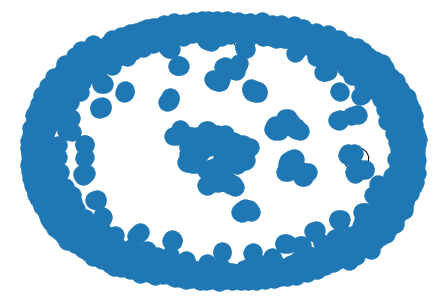

In [8]:
nx.draw(G.subgraph(sample(list(G.nodes()), 1000)))

<h3>Closness Centrality</h3>

In [9]:
deg_cent = nx.degree_centrality(G)
deg_cent_list = sorted(deg_cent.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
deg_cent_list[:5]

[('Mathematics', 0.032305433186490456),
 ('Geographic_coordinate_system', 0.014031652798172622),
 ('Language_family', 0.013705335291238376),
 ('Algebraic_structure', 0.00930004894762604),
 ('Arabic_language', 0.008484255180290423)]

<h3>Betweeness Centrality Centrality</h3>

In [10]:
bet_cent = nx.betweenness_centrality(G)
bet_cent_list = sorted(bet_cent.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
bet_cent_list[:5]

[('Mathematics', 0.2097112995788924),
 ('Language_family', 0.07796902533695975),
 ('Geographic_coordinate_system', 0.07789423428348695),
 ('Arabic_language', 0.04563803888920635),
 ('Computer_science', 0.040011546521450614)]

<h3>Diameter Clustering Coefficient and Number of triangels</h3>

In [11]:
nx.diameter(G)

10

In [12]:
cluster = nx.clustering(G)
cluster_list = sorted(cluster.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
cluster_list[:5]

[('Zhuyin', 1.0),
 ('Yaaku_language', 1.0),
 ('Western_Sahara', 1.0),
 ('Western_Romance_languages', 1.0),
 ('Unmoved_mover', 1.0)]

In [13]:
triangles = nx.triangles(G)
triangle_list = sorted(triangles.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
triangle_list[:5]

[('Mathematics', 448),
 ('Algebraic_structure', 364),
 ('Formal_science', 279),
 ('Social_science', 257),
 ('Natural_science', 233)]

<h1>Trained the neural network using Train Model.py file and then using the trained model to use in this</h1>

importing the trained model from my gdrive

In [19]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<h3>I have used tensor flow</h3>

In [20]:
import tensorflow

In [21]:
new_model = tensorflow.keras.models.load_model('drive/MyDrive/saved_model/my_model')

In [22]:
dic = {0:"Irrelevant", 1:"Easy", 2:"Intermediate", 3:"Advance"}

In [23]:
import numpy as np

In [24]:
node_classification = {"node":[], "labels":[]}
nodes_labelled = {}

<h1>Getting the predicted links that our neural network preidct when embedding is fed to it</h1>

In [34]:
for i in G.nodes:
    try:
        fv = G.nodes[i]["embedding"][1]
        label = np.argmax(new_model.predict(fv)[0])
        node_classification["node"].append(i)
        node_classification["labels"].append(label)
        nodes_labelled[i] = label
    except:
        continue


In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame.from_dict(node_classification)

In [37]:
df

,node,labels
0,Algebra,1
1,Algebra_over_a_field,1
2,Quadratic_formula,1
3,Arabic_language,2
4,Bonesetter,2
...,...,...
5764,History_of_psychology,2
5765,Subfields_of_psychology,1
5766,Behavioral_psychology,1
5767,Behavioural_genetics,2


<h2>Saving the predictions to a csv file</h2>

In [38]:
df.to_csv('predictions.csv')

<h1>Telling the user the order in which he should study the desired topic. If user picks a topic that is not in our graph then we can tell user what to do</h1>

In [48]:
# Developement of topics models
node = input("Enter the node which you want to study=>")
topics = []
if node in G.nodes:
    for n in G.neighbors(node):
        try:
            topics.append((n, nodes_labelled[n]))
        except:
            continue
    temp = []
    for each_topic in topics:
        for nb in G.neighbors(each_topic[0]):
            try:
                temp.append((nb, nodes_labelled[nb]))
            except:
                continue
    topics.extend(temp)
    topics.sort(key = lambda x: x[1])
    print("Order in which you should study topics from easy to hard is:1 for easy 2 for intermediate and 3 for hard")
    for topic, lable in topics:
        print(topic, lable)
else:
    print("No such node exists in out database")

Enter the node which you want to study=>Integral
Order in which you should study topics from easy to hard is:1 for easy 2 for intermediate and 3 for hard
Antiderivative 1
Integer 1
Calculus 1
Fundamental_theorem_of_calculus 1
Leibniz_integral_rule 1
Limit_of_a_function 1
Mean_value_theorem 1
Differential_calculus 1
Differentiable_curve 1
History_of_calculus 1
Calculus 1
Fundamental_theorem_of_calculus 1
Leibniz_integral_rule 1
Limit_of_a_function 1
Mean_value_theorem 1
Differential_calculus 1
Differential_of_a_function 1
Notation_for_differentiation 1
Exponential_function 1
Algebraic_integer 1
Algebraic_structure 1
Group_theory 1
Semidirect_product 1
Direct_product_of_groups 1
Group_homomorphism 1
Factorization 1
Limit_of_a_sequence 1
Polynomial_function 1
Double_root 1
Polynomial 1
Fundamental_theorem_of_arithmetic 1
Finite_set 1
Integer_programming 1
Algebraic_number 1
Tuple 1
Natural_number 1
Irreducible_polynomial 1
Numerator 1
Univariate_polynomial 1
Multiplicities 1
Constant_poly

In [ ]:
I